## Q2 A First attempt

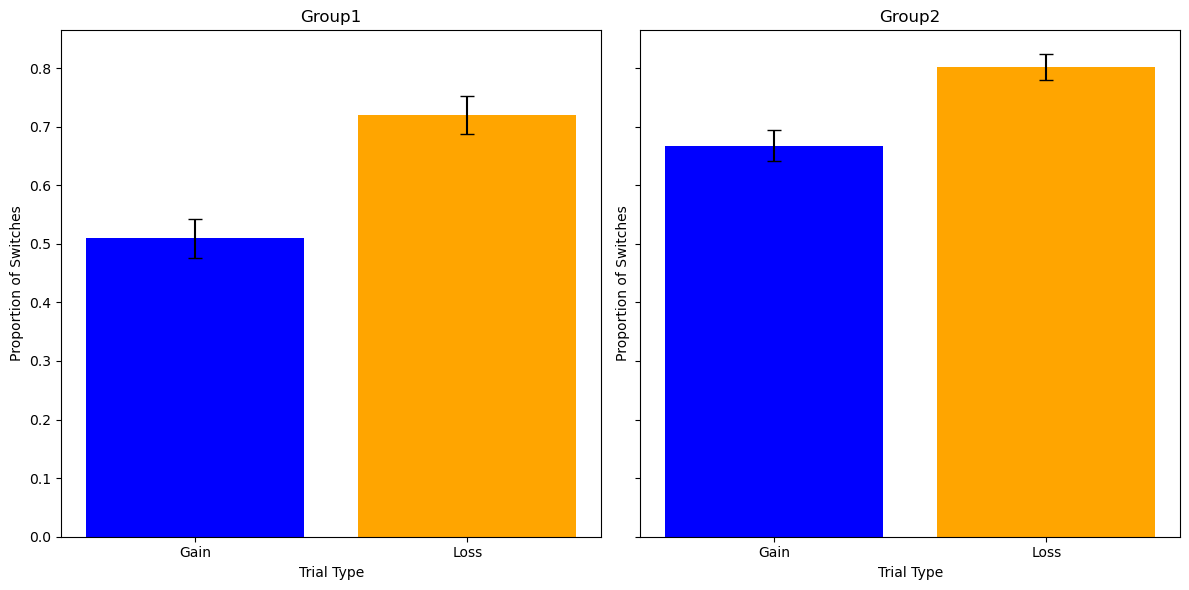

Statistical Test Results:
Between Groups (Switch_after_gain): Mann-Whitney U Test statistic=1209.5, p-value=0.00037248592235044627
Between Groups (Switch_after_loss): Mann-Whitney U Test statistic=1646.0, p-value=0.1677724505481475
Within Group1: Wilcoxon Test statistic=67.0, p-value=2.7865555258802674e-10
Within Group2: Wilcoxon Test statistic=129.0, p-value=7.197954490419646e-09

Statistical Test Results:
{'between_groups': {'switch_after_gain': {'test': 'Mann-Whitney', 'statistic': 1209.5, 'p_value': 0.00037248592235044627}, 'switch_after_loss': {'test': 'Mann-Whitney', 'statistic': 1646.0, 'p_value': 0.1677724505481475}}, 'group1_within': {'test': 'Wilcoxon', 'statistic': 67.0, 'p_value': 2.7865555258802674e-10}, 'group2_within': {'test': 'Wilcoxon', 'statistic': 129.0, 'p_value': 7.197954490419646e-09}}


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, wilcoxon

# Load Data
choice_file = 'choice.xlsx'
win_file = 'win.xlsx'
loss_file = 'loss.xlsx'

# Reading the Excel sheets (assuming each file contains 2 sheets for each group)
choices = pd.read_excel(choice_file, sheet_name=None)
wins = pd.read_excel(win_file, sheet_name=None)
losses = pd.read_excel(loss_file, sheet_name=None)

# Initialize results storage
group_results = {}

for group_name, choice_data in choices.items():
    win_data = wins[group_name].values
    loss_data = losses[group_name].values
    
    n_participants, n_trials = choice_data.shape
    switch_after_gain = []
    switch_after_loss = []
    
    # Loop through each participant
    for participant in range(n_participants):
        # Compute switches (change in deck choice between consecutive trials)
        switches = (np.diff(choice_data.iloc[participant]) != 0).astype(int)
        
        # Determine gain and loss trials
        gain_trials = (win_data[participant, :-1] >= loss_data[participant, :-1])
#         loss_trials = (loss_data[participant, :-1] < 0)
        loss_trials = (abs(loss_data[participant, :-1]) > win_data[participant, :-1])
        
        
        # Debug: Check gain and loss trial assignment
#         print(f"Participant {participant} - Gain Trials: {gain_trials}")
#         print(f"Participant {participant} - Loss Trials: {loss_trials}")
        
        # Calculate switch proportions for gain and loss trials
        if np.sum(gain_trials) > 0:
            switch_after_gain.append(np.sum(switches[gain_trials]) / np.sum(gain_trials))
        else:
            switch_after_gain.append(0)  # No gain trials, set proportion to 0
        
        if np.sum(loss_trials) > 0:
            switch_after_loss.append(np.sum(switches[loss_trials]) / np.sum(loss_trials))
        else:
            switch_after_loss.append(0)  # No loss trials, set proportion to 0
    
    # Store results for the group
    group_results[group_name] = {
        'switch_after_gain': switch_after_gain,
        'switch_after_loss': switch_after_loss
    }

# Plotting: Proportion of switches for gain and loss trials in each group
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

for i, (group_name, results) in enumerate(group_results.items()):
    gain_mean = np.mean(results['switch_after_gain'])
    loss_mean = np.mean(results['switch_after_loss'])
    gain_sem = np.std(results['switch_after_gain']) / np.sqrt(len(results['switch_after_gain']))
    loss_sem = np.std(results['switch_after_loss']) / np.sqrt(len(results['switch_after_loss']))

    axes[i].bar(['Gain', 'Loss'], [gain_mean, loss_mean], yerr=[gain_sem, loss_sem], capsize=5, color=['blue', 'orange'])
    axes[i].set_title(f'{group_name.capitalize()}')
    axes[i].set_ylabel('Proportion of Switches')
    axes[i].set_xlabel('Trial Type')

plt.tight_layout()
plt.show()

# Statistical Analysis
print("Statistical Test Results:")
results_dict = {'between_groups': {}, 'group1_within': {}, 'group2_within': {}}

for trial_type in ['switch_after_gain', 'switch_after_loss']:
    group1_data = group_results['group1'][trial_type]
    group2_data = group_results['group2'][trial_type]
    stat, p_val = mannwhitneyu(group1_data, group2_data)
    results_dict['between_groups'][trial_type] = {
        'test': 'Mann-Whitney',
        'statistic': stat,
        'p_value': p_val
    }

    print(f"Between Groups ({trial_type.capitalize()}): Mann-Whitney U Test statistic={stat}, p-value={p_val}")

for group_name, results in group_results.items():
    stat, p_val = wilcoxon(results['switch_after_gain'], results['switch_after_loss'])
    results_dict[f'{group_name}_within'] = {
        'test': 'Wilcoxon',
        'statistic': stat,
        'p_value': p_val
    }

    print(f"Within {group_name.capitalize()}: Wilcoxon Test statistic={stat}, p-value={p_val}")

# Display all results
print("\nStatistical Test Results:")
print(results_dict)


## Q2 A different metrics as compared to above

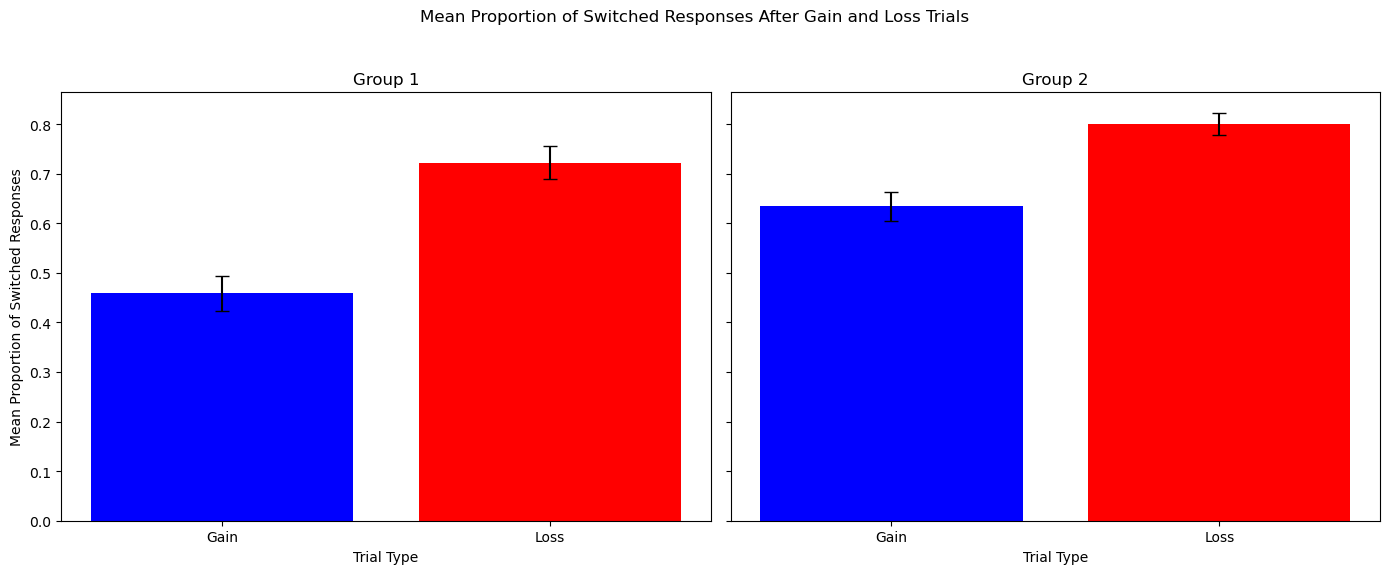

Diagnostic check for Group 1 Gain:
Mean: 0.459, Std Dev: 0.275, Min: 0.024, Max: 1.000
Number of unique values: 57
Data variability appears sufficient for analysis.

Diagnostic check for Group 1 Loss:
Mean: 0.722, Std Dev: 0.253, Min: 0.067, Max: 1.000
Number of unique values: 41
Data variability appears sufficient for analysis.

Diagnostic check for Group 2 Gain:
Mean: 0.634, Std Dev: 0.229, Min: 0.024, Max: 1.000
Number of unique values: 56
Data variability appears sufficient for analysis.

Diagnostic check for Group 2 Loss:
Mean: 0.801, Std Dev: 0.173, Min: 0.200, Max: 1.000
Number of unique values: 42
Data variability appears sufficient for analysis.

Analysis of deck choices BEFORE and AFTER loss trials:
Group 1 deck rankings (before loss):
Rank 1: Deck 3 (proportion: 0.44990892531876137)
Rank 2: Deck 1 (proportion: 0.31026108075288406)
Rank 3: Deck 2 (proportion: 0.12750455373406194)
Rank 4: Deck 4 (proportion: 0.11232544019429265)

Group 1 deck rankings (after loss):
Rank 1: Dec

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro, mannwhitneyu, wilcoxon, ttest_ind, ttest_rel
from math import sqrt

# Load the data 
choice = pd.read_excel('choice.xlsx', sheet_name=None)
win = pd.read_excel('win.xlsx', sheet_name=None)
loss = pd.read_excel('loss.xlsx', sheet_name=None)

# Function to calculate proportion of switches after a gain/loss trial
def calculate_switch_proportions(choice, win, loss):
    participants = choice.shape[0]
    trials = choice.shape[1]
    switch_after_gain = np.zeros(participants)
    switch_after_loss = np.zeros(participants)
    
    for i in range(participants):
        switches_gain = 0
        switches_loss = 0
        gain_trials = 0
        loss_trials = 0
        
        for t in range(trials - 1):
            if win.iloc[i, t] > abs(loss.iloc[i, t]):  # Gain trial (since loss values are <= 0)
                gain_trials += 1
                if choice.iloc[i, t] != choice.iloc[i, t + 1]:
                    switches_gain += 1
            else:  # Loss trial
                loss_trials += 1
                if choice.iloc[i, t] != choice.iloc[i, t + 1]:
                    switches_loss += 1
        
        switch_after_gain[i] = switches_gain / (gain_trials)  # Adding small epsilon to avoid division by zero
        switch_after_loss[i] = switches_loss / (loss_trials)  # Adding small epsilon to avoid division by zero

    return switch_after_gain, switch_after_loss

# Calculate switch proportions for both groups
switch_gain_group1, switch_loss_group1 = calculate_switch_proportions(choice['group1'], win['group1'], loss['group1'])
switch_gain_group2, switch_loss_group2 = calculate_switch_proportions(choice['group2'], win['group2'], loss['group2'])

# Calculate means and standard errors
mean_gain_group1 = np.mean(switch_gain_group1)
mean_loss_group1 = np.mean(switch_loss_group1)
mean_gain_group2 = np.mean(switch_gain_group2)
mean_loss_group2 = np.mean(switch_loss_group2)

sem_gain_group1 = stats.sem(switch_gain_group1)
sem_loss_group1 = stats.sem(switch_loss_group1)
sem_gain_group2 = stats.sem(switch_gain_group2)
sem_loss_group2 = stats.sem(switch_loss_group2)

# Plotting the bar plots with error bars
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Group 1 plot
axes[0].bar(['Gain', 'Loss'], [mean_gain_group1, mean_loss_group1], yerr=[sem_gain_group1, sem_loss_group1], capsize=5, color=['blue', 'red'])
axes[0].set_title('Group 1')
axes[0].set_xlabel('Trial Type')
axes[0].set_ylabel('Mean Proportion of Switched Responses')

# Group 2 plot
axes[1].bar(['Gain', 'Loss'], [mean_gain_group2, mean_loss_group2], yerr=[sem_gain_group2, sem_loss_group2], capsize=5, color=['blue', 'red'])
axes[1].set_title('Group 2')
axes[1].set_xlabel('Trial Type')

plt.suptitle('Mean Proportion of Switched Responses After Gain and Loss Trials')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Diagnostic check for variability and outliers
def diagnostic_check(data, group_name):
    print(f"Diagnostic check for {group_name}:")
    print(f"Mean: {np.mean(data):.3f}, Std Dev: {np.std(data):.3f}, Min: {np.min(data):.3f}, Max: {np.max(data):.3f}")
    print(f"Number of unique values: {len(np.unique(data))}")
    if len(np.unique(data)) < 5:
        print("Warning: Low variability detected in the data, which may affect statistical test outcomes.\n")
    else:
        print("Data variability appears sufficient for analysis.\n")

# Run diagnostic checks
for group_data, group_name in zip([switch_gain_group1, switch_loss_group1, switch_gain_group2, switch_loss_group2],
                                  ["Group 1 Gain", "Group 1 Loss", "Group 2 Gain", "Group 2 Loss"]):
    diagnostic_check(group_data, group_name)

# Function to calculate deck choice proportions before and after loss trials
def calculate_deck_proportions(choice, loss):
    participants = choice.shape[0]
    trials = choice.shape[1]
    deck_choices_before_loss = {1: 0, 2: 0, 3: 0, 4: 0}
    deck_choices_after_loss = {1: 0, 2: 0, 3: 0, 4: 0}
    
    for i in range(participants):
        for t in range(1, trials):
            if loss.iloc[i, t - 1] < 0:  # Loss trial occurred
                deck_choices_after_loss[choice.iloc[i, t]] += 1
                deck_choices_before_loss[choice.iloc[i, t - 1]] += 1
    
    total_before = sum(deck_choices_before_loss.values())
    total_after = sum(deck_choices_after_loss.values())
    
    proportions_before = {deck: count / total_before for deck, count in deck_choices_before_loss.items()}
    proportions_after = {deck: count / total_after for deck, count in deck_choices_after_loss.items()}
    
    return proportions_before, proportions_after

# Calculate deck choice proportions for both groups
proportions_before_group1, proportions_after_group1 = calculate_deck_proportions(choice['group1'], loss['group1'])
proportions_before_group2, proportions_after_group2 = calculate_deck_proportions(choice['group2'], loss['group2'])

# Print the results in a formatted way
def print_deck_analysis(proportions_before, proportions_after, group_name):
    print(f"{group_name} deck rankings (before loss):")
    for rank, (deck, proportion) in enumerate(sorted(proportions_before.items(), key=lambda x: x[1], reverse=True), 1):
        print(f"Rank {rank}: Deck {deck} (proportion: {proportion})")
    print()
    print(f"{group_name} deck rankings (after loss):")
    for rank, (deck, proportion) in enumerate(sorted(proportions_after.items(), key=lambda x: x[1], reverse=True), 1):
        print(f"Rank {rank}: Deck {deck} (proportion: {proportion})")
    print()

# Print deck choice analysis for both groups
print("Analysis of deck choices BEFORE and AFTER loss trials:")
print_deck_analysis(proportions_before_group1, proportions_after_group1, "Group 1")
print_deck_analysis(proportions_before_group2, proportions_after_group2, "Group 2")

# Statistical tests
def perform_stat_tests(switch_gain_group1, switch_loss_group1, switch_gain_group2, switch_loss_group2):
    # Normality check using Shapiro-Wilk test
    p_gain_group1 = shapiro(switch_gain_group1).pvalue
    p_loss_group1 = shapiro(switch_loss_group1).pvalue
    p_gain_group2 = shapiro(switch_gain_group2).pvalue
    p_loss_group2 = shapiro(switch_loss_group2).pvalue
    
    print("Shapiro-Wilk test for normality:")
    print(f"Group 1 Gain trials: p-value = {p_gain_group1}")
    print(f"Group 1 Loss trials: p-value = {p_loss_group1}")
    print(f"Group 2 Gain trials: p-value = {p_gain_group2}")
    print(f"Group 2 Loss trials: p-value = {p_loss_group2}\n")
    
    # Determine whether to use parametric or non-parametric tests based on normality results
    def use_parametric_test(p_values):
        return all(p > 0.05 for p in p_values)
    
    # Between groups comparison
    if use_parametric_test([p_gain_group1, p_gain_group2]):
        # Parametric test (t-test) for gain trials between groups
        t_gain, p_gain = ttest_ind(switch_gain_group1, switch_gain_group2)
        print(f"Gain trials between groups (t-test): t-statistic = {t_gain}, p-value = {p_gain}")
    else:
        # Non-parametric test (Mann-Whitney U) for gain trials between groups
        u_gain, p_gain = mannwhitneyu(switch_gain_group1, switch_gain_group2, alternative='two-sided')
        print(f"Gain trials between groups (Mann-Whitney U): U-statistic = {u_gain}, p-value = {p_gain}")
    
    if use_parametric_test([p_loss_group1, p_loss_group2]):
        # Parametric test (t-test) for loss trials between groups
        t_loss, p_loss = ttest_ind(switch_loss_group1, switch_loss_group2)
        print(f"Loss trials between groups (t-test): t-statistic = {t_loss}, p-value = {p_loss}\n")
    else:
        # Non-parametric test (Mann-Whitney U) for loss trials between groups
        u_loss, p_loss = mannwhitneyu(switch_loss_group1, switch_loss_group2, alternative='two-sided')
        print(f"Loss trials between groups (Mann-Whitney U): U-statistic = {u_loss}, p-value = {p_loss}\n")
    
    # Within group comparisons (Gain vs Loss)
    if use_parametric_test([p_gain_group1, p_loss_group1]):
        # Parametric test (paired t-test) for Group 1
        t_group1, p_group1 = ttest_rel(switch_gain_group1, switch_loss_group1)
        print(f"Group 1 (Gain vs Loss, t-test): t-statistic = {t_group1}, p-value = {p_group1}")
    else:
        # Non-parametric test (Wilcoxon) for Group 1
        w_group1, p_group1 = wilcoxon(switch_gain_group1, switch_loss_group1)
        print(f"Group 1 (Gain vs Loss, Wilcoxon): W-statistic = {w_group1}, p-value = {p_group1}")
    
    if use_parametric_test([p_gain_group2, p_loss_group2]):
        # Parametric test (paired t-test) for Group 2
        t_group2, p_group2 = ttest_rel(switch_gain_group2, switch_loss_group2)
        print(f"Group 2 (Gain vs Loss, t-test): t-statistic = {t_group2}, p-value = {p_group2}")
    else:
        # Non-parametric test (Wilcoxon) for Group 2
        w_group2, p_group2 = wilcoxon(switch_gain_group2, switch_loss_group2)
        print(f"Group 2 (Gain vs Loss, Wilcoxon): W-statistic = {w_group2}, p-value = {p_group2}")

# Perform statistical tests
perform_stat_tests(switch_gain_group1, switch_loss_group1, switch_gain_group2, switch_loss_group2)


## Q2 B combined with Q2A

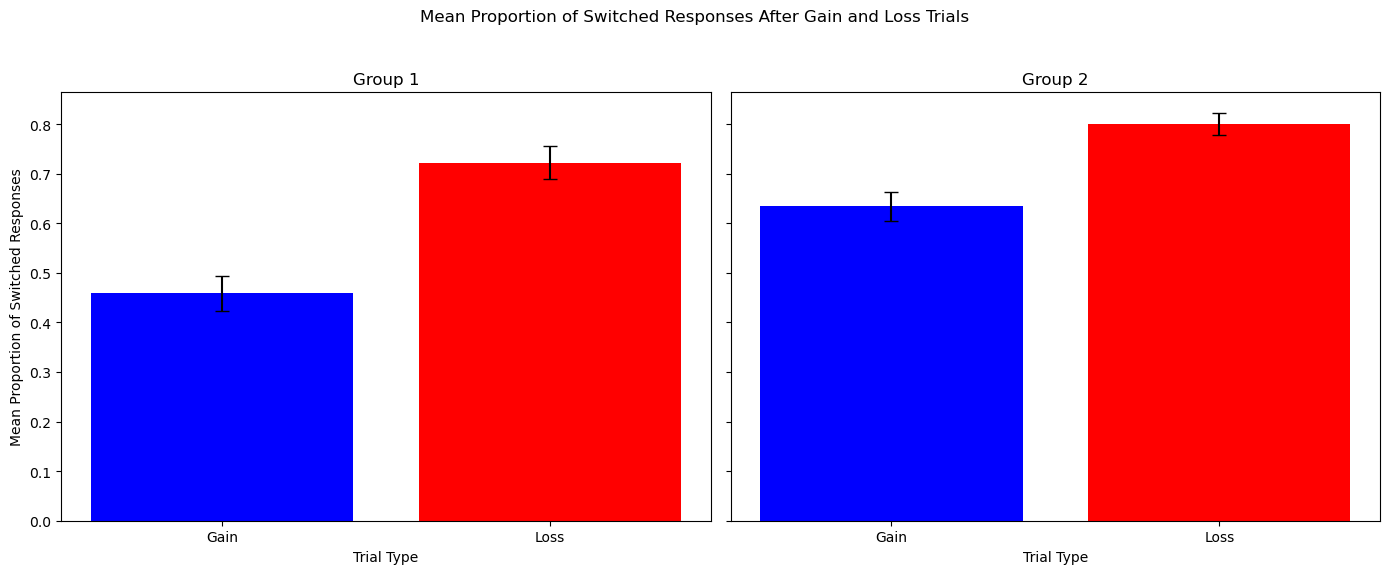

Diagnostic check for Group 1 Gain:
Mean: 0.459, Std Dev: 0.275, Min: 0.024, Max: 1.000
Number of unique values: 57
Data variability appears sufficient for analysis.

Diagnostic check for Group 1 Loss:
Mean: 0.722, Std Dev: 0.253, Min: 0.067, Max: 1.000
Number of unique values: 41
Data variability appears sufficient for analysis.

Diagnostic check for Group 2 Gain:
Mean: 0.634, Std Dev: 0.229, Min: 0.024, Max: 1.000
Number of unique values: 56
Data variability appears sufficient for analysis.

Diagnostic check for Group 2 Loss:
Mean: 0.801, Std Dev: 0.173, Min: 0.200, Max: 1.000
Number of unique values: 42
Data variability appears sufficient for analysis.

Analysis of deck choices BEFORE and AFTER loss trials:
Group 1 deck rankings (before loss):
Rank 1: Deck 3 (proportion: 0.44990892531876137)
Rank 2: Deck 1 (proportion: 0.31026108075288406)
Rank 3: Deck 2 (proportion: 0.12750455373406194)
Rank 4: Deck 4 (proportion: 0.11232544019429265)

Group 1 deck rankings (after loss):
Rank 1: Dec

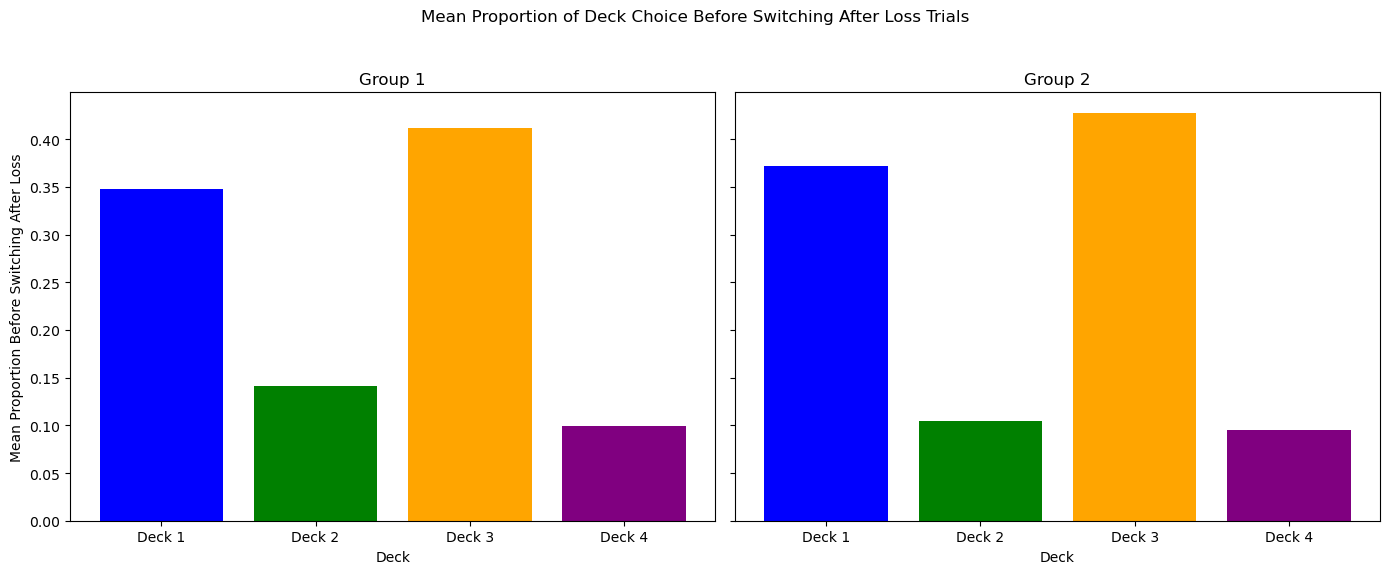

Ranking of decks for Group 1 (based on mean proportions before switching after loss):
Rank 1: Deck 3 (Proportion: 0.411360)
Rank 2: Deck 1 (Proportion: 0.347676)
Rank 3: Deck 2 (Proportion: 0.141136)
Rank 4: Deck 4 (Proportion: 0.099828)

Ranking of decks for Group 2 (based on mean proportions before switching after loss):
Rank 1: Deck 3 (Proportion: 0.427758)
Rank 2: Deck 1 (Proportion: 0.372242)
Rank 3: Deck 2 (Proportion: 0.104626)
Rank 4: Deck 4 (Proportion: 0.095374)
Shapiro-Wilk test for normality:
Group 1 Gain trials: p-value = 0.03528638929128647
Group 1 Loss trials: p-value = 0.000120078373583965
Group 2 Gain trials: p-value = 0.0038543727714568377
Group 2 Loss trials: p-value = 3.6782221286557615e-05

Gain trials between groups (Mann-Whitney U): U-statistic = 1170.0, p-value = 0.0001728466905762568
Loss trials between groups (Mann-Whitney U): U-statistic = 1671.5, p-value = 0.21088255926137145

Group 1 (Gain vs Loss, Wilcoxon): W-statistic = 62.0, p-value = 2.209812612311861e

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro, mannwhitneyu, wilcoxon, ttest_ind, ttest_rel
from math import sqrt

# Load the data 
choice = pd.read_excel('choice.xlsx', sheet_name=None)
win = pd.read_excel('win.xlsx', sheet_name=None)
loss = pd.read_excel('loss.xlsx', sheet_name=None)

# Function to calculate proportion of switches after a gain/loss trial
def calculate_switch_proportions(choice, win, loss):
    participants = choice.shape[0]
    trials = choice.shape[1]
    switch_after_gain = np.zeros(participants)
    switch_after_loss = np.zeros(participants)
    
    for i in range(participants):
        switches_gain = 0
        switches_loss = 0
        gain_trials = 0
        loss_trials = 0
        
        for t in range(trials - 1):
            if win.iloc[i, t] > abs(loss.iloc[i, t]):  # Gain trial (since loss values are <= 0)
                gain_trials += 1
                if choice.iloc[i, t] != choice.iloc[i, t + 1]:
                    switches_gain += 1
            else:  # Loss trial
                loss_trials += 1
                if choice.iloc[i, t] != choice.iloc[i, t + 1]:
                    switches_loss += 1
        
        switch_after_gain[i] = switches_gain / (gain_trials)  # Adding small epsilon to avoid division by zero
        switch_after_loss[i] = switches_loss / (loss_trials)  # Adding small epsilon to avoid division by zero

    return switch_after_gain, switch_after_loss

# Calculate switch proportions for both groups
switch_gain_group1, switch_loss_group1 = calculate_switch_proportions(choice['group1'], win['group1'], loss['group1'])
switch_gain_group2, switch_loss_group2 = calculate_switch_proportions(choice['group2'], win['group2'], loss['group2'])

# Calculate means and standard errors
mean_gain_group1 = np.mean(switch_gain_group1)
mean_loss_group1 = np.mean(switch_loss_group1)
mean_gain_group2 = np.mean(switch_gain_group2)
mean_loss_group2 = np.mean(switch_loss_group2)

sem_gain_group1 = stats.sem(switch_gain_group1)
sem_loss_group1 = stats.sem(switch_loss_group1)
sem_gain_group2 = stats.sem(switch_gain_group2)
sem_loss_group2 = stats.sem(switch_loss_group2)

# Plotting the bar plots with error bars
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Group 1 plot
axes[0].bar(['Gain', 'Loss'], [mean_gain_group1, mean_loss_group1], yerr=[sem_gain_group1, sem_loss_group1], capsize=5, color=['blue', 'red'])
axes[0].set_title('Group 1')
axes[0].set_xlabel('Trial Type')
axes[0].set_ylabel('Mean Proportion of Switched Responses')

# Group 2 plot
axes[1].bar(['Gain', 'Loss'], [mean_gain_group2, mean_loss_group2], yerr=[sem_gain_group2, sem_loss_group2], capsize=5, color=['blue', 'red'])
axes[1].set_title('Group 2')
axes[1].set_xlabel('Trial Type')

plt.suptitle('Mean Proportion of Switched Responses After Gain and Loss Trials')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Diagnostic check for variability and outliers
def diagnostic_check(data, group_name):
    print(f"Diagnostic check for {group_name}:")
    print(f"Mean: {np.mean(data):.3f}, Std Dev: {np.std(data):.3f}, Min: {np.min(data):.3f}, Max: {np.max(data):.3f}")
    print(f"Number of unique values: {len(np.unique(data))}")
    if len(np.unique(data)) < 5:
        print("Warning: Low variability detected in the data, which may affect statistical test outcomes.\n")
    else:
        print("Data variability appears sufficient for analysis.\n")

# Run diagnostic checks
for group_data, group_name in zip([switch_gain_group1, switch_loss_group1, switch_gain_group2, switch_loss_group2],
                                  ["Group 1 Gain", "Group 1 Loss", "Group 2 Gain", "Group 2 Loss"]):
    diagnostic_check(group_data, group_name)

# Function to calculate deck choice proportions before and after loss trials
def calculate_deck_proportions(choice, loss):
    participants = choice.shape[0]
    trials = choice.shape[1]
    deck_choices_before_loss = {1: 0, 2: 0, 3: 0, 4: 0}
    deck_choices_after_loss = {1: 0, 2: 0, 3: 0, 4: 0}
    
    for i in range(participants):
        for t in range(1, trials):
            if loss.iloc[i, t - 1] < 0:  # Loss trial occurred
                deck_choices_after_loss[choice.iloc[i, t]] += 1
                deck_choices_before_loss[choice.iloc[i, t - 1]] += 1
    
    total_before = sum(deck_choices_before_loss.values())
    total_after = sum(deck_choices_after_loss.values())
    
    proportions_before = {deck: count / total_before for deck, count in deck_choices_before_loss.items()}
    proportions_after = {deck: count / total_after for deck, count in deck_choices_after_loss.items()}
    
    return proportions_before, proportions_after

# Calculate deck choice proportions for both groups
proportions_before_group1, proportions_after_group1 = calculate_deck_proportions(choice['group1'], loss['group1'])
proportions_before_group2, proportions_after_group2 = calculate_deck_proportions(choice['group2'], loss['group2'])

# Print the results in a formatted way
def print_deck_analysis(proportions_before, proportions_after, group_name):
    print(f"{group_name} deck rankings (before loss):")
    for rank, (deck, proportion) in enumerate(sorted(proportions_before.items(), key=lambda x: x[1], reverse=True), 1):
        print(f"Rank {rank}: Deck {deck} (proportion: {proportion})")
    print()
    print(f"{group_name} deck rankings (after loss):")
    for rank, (deck, proportion) in enumerate(sorted(proportions_after.items(), key=lambda x: x[1], reverse=True), 1):
        print(f"Rank {rank}: Deck {deck} (proportion: {proportion})")
    print()

# Print deck choice analysis for both groups
print("Analysis of deck choices BEFORE and AFTER loss trials:")
print_deck_analysis(proportions_before_group1, proportions_after_group1, "Group 1")
print_deck_analysis(proportions_before_group2, proportions_after_group2, "Group 2")

# Function to determine the deck chosen before switching after a loss trial
def calculate_deck_before_switch(choice, loss):
    participants = choice.shape[0]
    trials = choice.shape[1]
    deck_before_switch = {1: 0, 2: 0, 3: 0, 4: 0}
    total_switches = 0

    for i in range(participants):
        for t in range(trials - 1):
            if loss.iloc[i, t] < 0 and choice.iloc[i, t] != choice.iloc[i, t + 1]:  # Loss trial and switch occurred
                deck_before_switch[choice.iloc[i, t]] += 1
                total_switches += 1

    proportions_before_switch = {deck: count / total_switches for deck, count in deck_before_switch.items()}
    return proportions_before_switch

# Calculate deck choice proportions before switching after loss trials for both groups
proportions_before_switch_group1 = calculate_deck_before_switch(choice['group1'], loss['group1'])
proportions_before_switch_group2 = calculate_deck_before_switch(choice['group2'], loss['group2'])

# Plotting the bar plots for deck choice before switching after loss trials
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Group 1 plot
axes[0].bar(['Deck 1', 'Deck 2', 'Deck 3', 'Deck 4'], list(proportions_before_switch_group1.values()), capsize=5, color=['blue', 'green', 'orange', 'purple'])
axes[0].set_title('Group 1')
axes[0].set_xlabel('Deck')
axes[0].set_ylabel('Mean Proportion Before Switching After Loss')

# Group 2 plot
axes[1].bar(['Deck 1', 'Deck 2', 'Deck 3', 'Deck 4'], list(proportions_before_switch_group2.values()), capsize=5, color=['blue', 'green', 'orange', 'purple'])
axes[1].set_title('Group 2')
axes[1].set_xlabel('Deck')

plt.suptitle('Mean Proportion of Deck Choice Before Switching After Loss Trials')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Ranking decks in decreasing order based on their mean proportions for each group
ranking_group1 = sorted(zip(['Deck 1', 'Deck 2', 'Deck 3', 'Deck 4'], proportions_before_switch_group1.values()), key=lambda x: x[1], reverse=True)
ranking_group2 = sorted(zip(['Deck 1', 'Deck 2', 'Deck 3', 'Deck 4'], proportions_before_switch_group2.values()), key=lambda x: x[1], reverse=True)

print("Ranking of decks for Group 1 (based on mean proportions before switching after loss):")
for rank, (deck, proportion) in enumerate(ranking_group1, start=1):
    print(f"Rank {rank}: {deck} (Proportion: {proportion:.6f})")

print("\nRanking of decks for Group 2 (based on mean proportions before switching after loss):")
for rank, (deck, proportion) in enumerate(ranking_group2, start=1):
    print(f"Rank {rank}: {deck} (Proportion: {proportion:.6f})")

# Statistical tests
def perform_stat_tests(switch_gain_group1, switch_loss_group1, switch_gain_group2, switch_loss_group2):
    # Normality check using Shapiro-Wilk test
    p_gain_group1 = shapiro(switch_gain_group1).pvalue
    p_loss_group1 = shapiro(switch_loss_group1).pvalue
    p_gain_group2 = shapiro(switch_gain_group2).pvalue
    p_loss_group2 = shapiro(switch_loss_group2).pvalue
    
    print("Shapiro-Wilk test for normality:")
    print(f"Group 1 Gain trials: p-value = {p_gain_group1}")
    print(f"Group 1 Loss trials: p-value = {p_loss_group1}")
    print(f"Group 2 Gain trials: p-value = {p_gain_group2}")
    print(f"Group 2 Loss trials: p-value = {p_loss_group2}\n")
    
    # Determine whether to use parametric or non-parametric tests based on normality results
    def use_parametric_test(p_values):
        return all(p > 0.05 for p in p_values)
    
    # Between groups comparison
    if use_parametric_test([p_gain_group1, p_gain_group2]):
        # Parametric test (t-test) for gain trials between groups
        t_gain, p_gain = ttest_ind(switch_gain_group1, switch_gain_group2)
        print(f"Gain trials between groups (t-test): t-statistic = {t_gain}, p-value = {p_gain}")
    else:
        # Non-parametric test (Mann-Whitney U) for gain trials between groups
        u_gain, p_gain = mannwhitneyu(switch_gain_group1, switch_gain_group2, alternative='two-sided')
        print(f"Gain trials between groups (Mann-Whitney U): U-statistic = {u_gain}, p-value = {p_gain}")
    
    if use_parametric_test([p_loss_group1, p_loss_group2]):
        # Parametric test (t-test) for loss trials between groups
        t_loss, p_loss = ttest_ind(switch_loss_group1, switch_loss_group2)
        print(f"Loss trials between groups (t-test): t-statistic = {t_loss}, p-value = {p_loss}\n")
    else:
        # Non-parametric test (Mann-Whitney U) for loss trials between groups
        u_loss, p_loss = mannwhitneyu(switch_loss_group1, switch_loss_group2, alternative='two-sided')
        print(f"Loss trials between groups (Mann-Whitney U): U-statistic = {u_loss}, p-value = {p_loss}\n")
    
    # Within group comparisons (Gain vs Loss)
    if use_parametric_test([p_gain_group1, p_loss_group1]):
        # Parametric test (paired t-test) for Group 1
        t_group1, p_group1 = ttest_rel(switch_gain_group1, switch_loss_group1)
        print(f"Group 1 (Gain vs Loss, t-test): t-statistic = {t_group1}, p-value = {p_group1}")
    else:
        # Non-parametric test (Wilcoxon) for Group 1
        w_group1, p_group1 = wilcoxon(switch_gain_group1, switch_loss_group1)
        print(f"Group 1 (Gain vs Loss, Wilcoxon): W-statistic = {w_group1}, p-value = {p_group1}")
    
    if use_parametric_test([p_gain_group2, p_loss_group2]):
        # Parametric test (paired t-test) for Group 2
        t_group2, p_group2 = ttest_rel(switch_gain_group2, switch_loss_group2)
        print(f"Group 2 (Gain vs Loss, t-test): t-statistic = {t_group2}, p-value = {p_group2}")
    else:
        # Non-parametric test (Wilcoxon) for Group 2
        w_group2, p_group2 = wilcoxon(switch_gain_group2, switch_loss_group2)
        print(f"Group 2 (Gain vs Loss, Wilcoxon): W-statistic = {w_group2}, p-value = {p_group2}")

# Perform statistical tests
perform_stat_tests(switch_gain_group1, switch_loss_group1, switch_gain_group2, switch_loss_group2)


## Q2 C combined with A, B

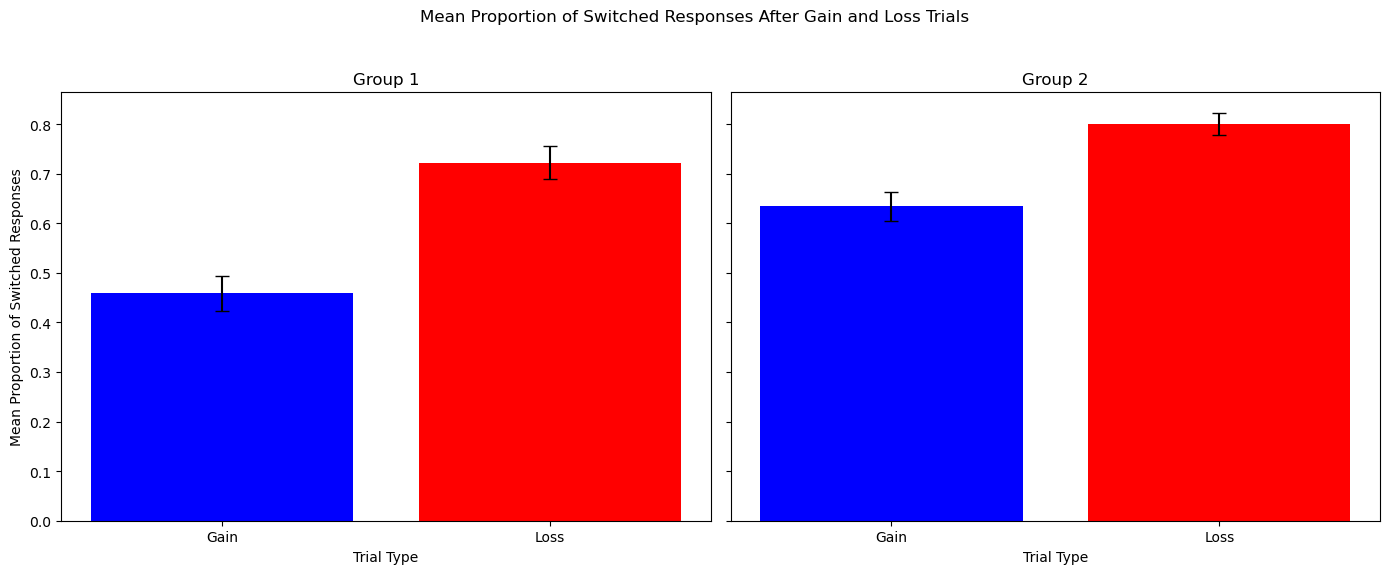

Diagnostic check for Group 1 Gain:
Mean: 0.459, Std Dev: 0.275, Min: 0.024, Max: 1.000
Number of unique values: 57
Data variability appears sufficient for analysis.

Diagnostic check for Group 1 Loss:
Mean: 0.722, Std Dev: 0.253, Min: 0.067, Max: 1.000
Number of unique values: 41
Data variability appears sufficient for analysis.

Diagnostic check for Group 2 Gain:
Mean: 0.634, Std Dev: 0.229, Min: 0.024, Max: 1.000
Number of unique values: 56
Data variability appears sufficient for analysis.

Diagnostic check for Group 2 Loss:
Mean: 0.801, Std Dev: 0.173, Min: 0.200, Max: 1.000
Number of unique values: 42
Data variability appears sufficient for analysis.

Analysis of deck choices BEFORE and AFTER loss trials:
Group 1 deck rankings (before loss):
Rank 1: Deck 3 (proportion: 0.44990892531876137)
Rank 2: Deck 1 (proportion: 0.31026108075288406)
Rank 3: Deck 2 (proportion: 0.12750455373406194)
Rank 4: Deck 4 (proportion: 0.11232544019429265)

Group 1 deck rankings (after loss):
Rank 1: Dec

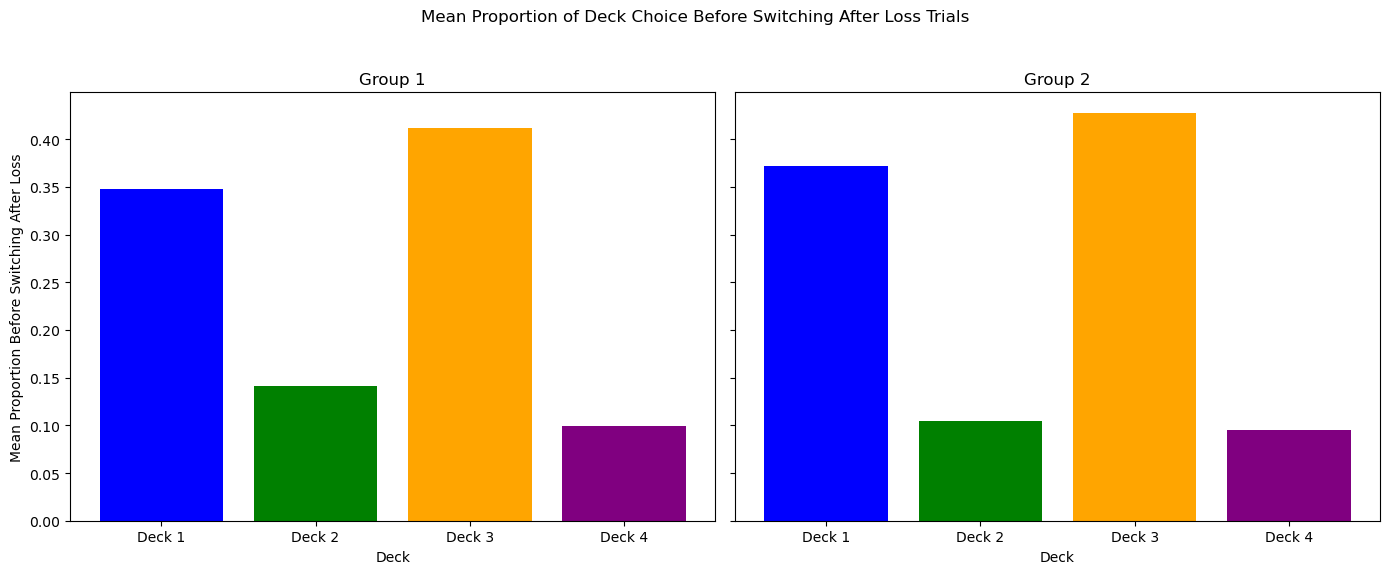

Ranking of decks for Group 1 (based on mean proportions before switching after loss):
Rank 1: Deck 3 (Proportion: 0.411360)
Rank 2: Deck 1 (Proportion: 0.347676)
Rank 3: Deck 2 (Proportion: 0.141136)
Rank 4: Deck 4 (Proportion: 0.099828)

Ranking of decks for Group 2 (based on mean proportions before switching after loss):
Rank 1: Deck 3 (Proportion: 0.427758)
Rank 2: Deck 1 (Proportion: 0.372242)
Rank 3: Deck 2 (Proportion: 0.104626)
Rank 4: Deck 4 (Proportion: 0.095374)


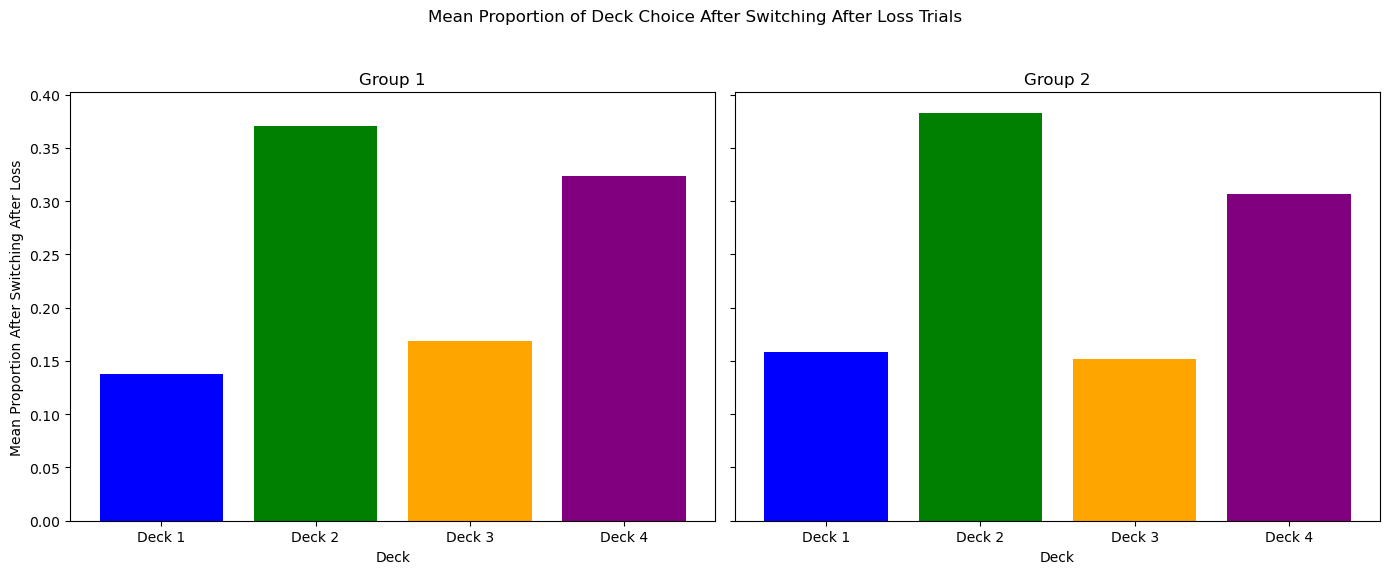

Ranking of decks for Group 1 (based on mean proportions after switching after loss):
Rank 1: Deck 2 (Proportion: 0.370052)
Rank 2: Deck 4 (Proportion: 0.323580)
Rank 3: Deck 3 (Proportion: 0.168675)
Rank 4: Deck 1 (Proportion: 0.137694)

Ranking of decks for Group 2 (based on mean proportions after switching after loss):
Rank 1: Deck 2 (Proportion: 0.382918)
Rank 2: Deck 4 (Proportion: 0.306762)
Rank 3: Deck 1 (Proportion: 0.158719)
Rank 4: Deck 3 (Proportion: 0.151601)
Shapiro-Wilk test for normality:
Group 1 Gain trials: p-value = 0.03528638929128647
Group 1 Loss trials: p-value = 0.000120078373583965
Group 2 Gain trials: p-value = 0.0038543727714568377
Group 2 Loss trials: p-value = 3.6782221286557615e-05

Gain trials between groups (Mann-Whitney U): U-statistic = 1170.0, p-value = 0.0001728466905762568
Loss trials between groups (Mann-Whitney U): U-statistic = 1671.5, p-value = 0.21088255926137145

Group 1 (Gain vs Loss, Wilcoxon): W-statistic = 62.0, p-value = 2.209812612311861e-1

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro, mannwhitneyu, wilcoxon, ttest_ind, ttest_rel
from math import sqrt

# Load the data 
choice = pd.read_excel('choice.xlsx', sheet_name=None)
win = pd.read_excel('win.xlsx', sheet_name=None)
loss = pd.read_excel('loss.xlsx', sheet_name=None)

# Function to calculate proportion of switches after a gain/loss trial
def calculate_switch_proportions(choice, win, loss):
    participants = choice.shape[0]
    trials = choice.shape[1]
    switch_after_gain = np.zeros(participants)
    switch_after_loss = np.zeros(participants)
    
    for i in range(participants):
        switches_gain = 0
        switches_loss = 0
        gain_trials = 0
        loss_trials = 0
        
        for t in range(trials - 1):
            if win.iloc[i, t] > abs(loss.iloc[i, t]):  # Gain trial (since loss values are <= 0)
                gain_trials += 1
                if choice.iloc[i, t] != choice.iloc[i, t + 1]:
                    switches_gain += 1
            else:  # Loss trial
                loss_trials += 1
                if choice.iloc[i, t] != choice.iloc[i, t + 1]:
                    switches_loss += 1
        
        switch_after_gain[i] = switches_gain / (gain_trials)  # Adding small epsilon to avoid division by zero
        switch_after_loss[i] = switches_loss / (loss_trials)  # Adding small epsilon to avoid division by zero

    return switch_after_gain, switch_after_loss

# Calculate switch proportions for both groups
switch_gain_group1, switch_loss_group1 = calculate_switch_proportions(choice['group1'], win['group1'], loss['group1'])
switch_gain_group2, switch_loss_group2 = calculate_switch_proportions(choice['group2'], win['group2'], loss['group2'])

# Calculate means and standard errors
mean_gain_group1 = np.mean(switch_gain_group1)
mean_loss_group1 = np.mean(switch_loss_group1)
mean_gain_group2 = np.mean(switch_gain_group2)
mean_loss_group2 = np.mean(switch_loss_group2)

sem_gain_group1 = stats.sem(switch_gain_group1)
sem_loss_group1 = stats.sem(switch_loss_group1)
sem_gain_group2 = stats.sem(switch_gain_group2)
sem_loss_group2 = stats.sem(switch_loss_group2)

# Plotting the bar plots with error bars
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Group 1 plot
axes[0].bar(['Gain', 'Loss'], [mean_gain_group1, mean_loss_group1], yerr=[sem_gain_group1, sem_loss_group1], capsize=5, color=['blue', 'red'])
axes[0].set_title('Group 1')
axes[0].set_xlabel('Trial Type')
axes[0].set_ylabel('Mean Proportion of Switched Responses')

# Group 2 plot
axes[1].bar(['Gain', 'Loss'], [mean_gain_group2, mean_loss_group2], yerr=[sem_gain_group2, sem_loss_group2], capsize=5, color=['blue', 'red'])
axes[1].set_title('Group 2')
axes[1].set_xlabel('Trial Type')

plt.suptitle('Mean Proportion of Switched Responses After Gain and Loss Trials')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Diagnostic check for variability and outliers
def diagnostic_check(data, group_name):
    print(f"Diagnostic check for {group_name}:")
    print(f"Mean: {np.mean(data):.3f}, Std Dev: {np.std(data):.3f}, Min: {np.min(data):.3f}, Max: {np.max(data):.3f}")
    print(f"Number of unique values: {len(np.unique(data))}")
    if len(np.unique(data)) < 5:
        print("Warning: Low variability detected in the data, which may affect statistical test outcomes.\n")
    else:
        print("Data variability appears sufficient for analysis.\n")

# Run diagnostic checks
for group_data, group_name in zip([switch_gain_group1, switch_loss_group1, switch_gain_group2, switch_loss_group2],
                                  ["Group 1 Gain", "Group 1 Loss", "Group 2 Gain", "Group 2 Loss"]):
    diagnostic_check(group_data, group_name)

# Function to calculate deck choice proportions before and after loss trials
def calculate_deck_proportions(choice, loss):
    participants = choice.shape[0]
    trials = choice.shape[1]
    deck_choices_before_loss = {1: 0, 2: 0, 3: 0, 4: 0}
    deck_choices_after_loss = {1: 0, 2: 0, 3: 0, 4: 0}
    
    for i in range(participants):
        for t in range(1, trials):
            if loss.iloc[i, t - 1] < 0:  # Loss trial occurred
                deck_choices_after_loss[choice.iloc[i, t]] += 1
                deck_choices_before_loss[choice.iloc[i, t - 1]] += 1
    
    total_before = sum(deck_choices_before_loss.values())
    total_after = sum(deck_choices_after_loss.values())
    
    proportions_before = {deck: count / total_before for deck, count in deck_choices_before_loss.items()}
    proportions_after = {deck: count / total_after for deck, count in deck_choices_after_loss.items()}
    
    return proportions_before, proportions_after

# Calculate deck choice proportions for both groups
proportions_before_group1, proportions_after_group1 = calculate_deck_proportions(choice['group1'], loss['group1'])
proportions_before_group2, proportions_after_group2 = calculate_deck_proportions(choice['group2'], loss['group2'])

# Print the results in a formatted way
def print_deck_analysis(proportions_before, proportions_after, group_name):
    print(f"{group_name} deck rankings (before loss):")
    for rank, (deck, proportion) in enumerate(sorted(proportions_before.items(), key=lambda x: x[1], reverse=True), 1):
        print(f"Rank {rank}: Deck {deck} (proportion: {proportion})")
    print()
    print(f"{group_name} deck rankings (after loss):")
    for rank, (deck, proportion) in enumerate(sorted(proportions_after.items(), key=lambda x: x[1], reverse=True), 1):
        print(f"Rank {rank}: Deck {deck} (proportion: {proportion})")
    print()

# Print deck choice analysis for both groups
print("Analysis of deck choices BEFORE and AFTER loss trials:")
print_deck_analysis(proportions_before_group1, proportions_after_group1, "Group 1")
print_deck_analysis(proportions_before_group2, proportions_after_group2, "Group 2")

# Function to determine the deck chosen before switching after a loss trial
def calculate_deck_before_switch(choice, loss):
    participants = choice.shape[0]
    trials = choice.shape[1]
    deck_before_switch = {1: 0, 2: 0, 3: 0, 4: 0}
    total_switches = 0

    for i in range(participants):
        for t in range(trials - 1):
            if loss.iloc[i, t] < 0 and choice.iloc[i, t] != choice.iloc[i, t + 1]:  # Loss trial and switch occurred
                deck_before_switch[choice.iloc[i, t]] += 1
                total_switches += 1

    proportions_before_switch = {deck: count / total_switches for deck, count in deck_before_switch.items()}
    return proportions_before_switch

# Calculate deck choice proportions before switching after loss trials for both groups
proportions_before_switch_group1 = calculate_deck_before_switch(choice['group1'], loss['group1'])
proportions_before_switch_group2 = calculate_deck_before_switch(choice['group2'], loss['group2'])

# Plotting the bar plots for deck choice before switching after loss trials
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Group 1 plot
axes[0].bar(['Deck 1', 'Deck 2', 'Deck 3', 'Deck 4'], list(proportions_before_switch_group1.values()), capsize=5, color=['blue', 'green', 'orange', 'purple'])
axes[0].set_title('Group 1')
axes[0].set_xlabel('Deck')
axes[0].set_ylabel('Mean Proportion Before Switching After Loss')

# Group 2 plot
axes[1].bar(['Deck 1', 'Deck 2', 'Deck 3', 'Deck 4'], list(proportions_before_switch_group2.values()), capsize=5, color=['blue', 'green', 'orange', 'purple'])
axes[1].set_title('Group 2')
axes[1].set_xlabel('Deck')

plt.suptitle('Mean Proportion of Deck Choice Before Switching After Loss Trials')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Ranking decks in decreasing order based on their mean proportions for each group
ranking_group1 = sorted(zip(['Deck 1', 'Deck 2', 'Deck 3', 'Deck 4'], proportions_before_switch_group1.values()), key=lambda x: x[1], reverse=True)
ranking_group2 = sorted(zip(['Deck 1', 'Deck 2', 'Deck 3', 'Deck 4'], proportions_before_switch_group2.values()), key=lambda x: x[1], reverse=True)

print("Ranking of decks for Group 1 (based on mean proportions before switching after loss):")
for rank, (deck, proportion) in enumerate(ranking_group1, start=1):
    print(f"Rank {rank}: {deck} (Proportion: {proportion:.6f})")

print("\nRanking of decks for Group 2 (based on mean proportions before switching after loss):")
for rank, (deck, proportion) in enumerate(ranking_group2, start=1):
    print(f"Rank {rank}: {deck} (Proportion: {proportion:.6f})")

# Function to determine the deck chosen after switching after a loss trial
def calculate_deck_after_switch(choice, loss):
    participants = choice.shape[0]
    trials = choice.shape[1]
    deck_after_switch = {1: 0, 2: 0, 3: 0, 4: 0}
    total_switches = 0

    for i in range(participants):
        for t in range(trials - 1):
            if loss.iloc[i, t] < 0 and choice.iloc[i, t] != choice.iloc[i, t + 1]:  # Loss trial and switch occurred
                deck_after_switch[choice.iloc[i, t + 1]] += 1
                total_switches += 1

    proportions_after_switch = {deck: count / total_switches for deck, count in deck_after_switch.items()}
    return proportions_after_switch

# Calculate deck choice proportions after switching after loss trials for both groups
proportions_after_switch_group1 = calculate_deck_after_switch(choice['group1'], loss['group1'])
proportions_after_switch_group2 = calculate_deck_after_switch(choice['group2'], loss['group2'])

# Plotting the bar plots for deck choice after switching after loss trials
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Group 1 plot
axes[0].bar(['Deck 1', 'Deck 2', 'Deck 3', 'Deck 4'], list(proportions_after_switch_group1.values()), capsize=5, color=['blue', 'green', 'orange', 'purple'])
axes[0].set_title('Group 1')
axes[0].set_xlabel('Deck')
axes[0].set_ylabel('Mean Proportion After Switching After Loss')

# Group 2 plot
axes[1].bar(['Deck 1', 'Deck 2', 'Deck 3', 'Deck 4'], list(proportions_after_switch_group2.values()), capsize=5, color=['blue', 'green', 'orange', 'purple'])
axes[1].set_title('Group 2')
axes[1].set_xlabel('Deck')

plt.suptitle('Mean Proportion of Deck Choice After Switching After Loss Trials')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Ranking decks in decreasing order based on their mean proportions for each group
ranking_after_switch_group1 = sorted(zip(['Deck 1', 'Deck 2', 'Deck 3', 'Deck 4'], proportions_after_switch_group1.values()), key=lambda x: x[1], reverse=True)
ranking_after_switch_group2 = sorted(zip(['Deck 1', 'Deck 2', 'Deck 3', 'Deck 4'], proportions_after_switch_group2.values()), key=lambda x: x[1], reverse=True)

print("Ranking of decks for Group 1 (based on mean proportions after switching after loss):")
for rank, (deck, proportion) in enumerate(ranking_after_switch_group1, start=1):
    print(f"Rank {rank}: {deck} (Proportion: {proportion:.6f})")

print("\nRanking of decks for Group 2 (based on mean proportions after switching after loss):")
for rank, (deck, proportion) in enumerate(ranking_after_switch_group2, start=1):
    print(f"Rank {rank}: {deck} (Proportion: {proportion:.6f})")

# Statistical tests
def perform_stat_tests(switch_gain_group1, switch_loss_group1, switch_gain_group2, switch_loss_group2):
    # Normality check using Shapiro-Wilk test
    p_gain_group1 = shapiro(switch_gain_group1).pvalue
    p_loss_group1 = shapiro(switch_loss_group1).pvalue
    p_gain_group2 = shapiro(switch_gain_group2).pvalue
    p_loss_group2 = shapiro(switch_loss_group2).pvalue
    
    print("Shapiro-Wilk test for normality:")
    print(f"Group 1 Gain trials: p-value = {p_gain_group1}")
    print(f"Group 1 Loss trials: p-value = {p_loss_group1}")
    print(f"Group 2 Gain trials: p-value = {p_gain_group2}")
    print(f"Group 2 Loss trials: p-value = {p_loss_group2}\n")
    
    # Determine whether to use parametric or non-parametric tests based on normality results
    def use_parametric_test(p_values):
        return all(p > 0.05 for p in p_values)
    
    # Between groups comparison
    if use_parametric_test([p_gain_group1, p_gain_group2]):
        # Parametric test (t-test) for gain trials between groups
        t_gain, p_gain = ttest_ind(switch_gain_group1, switch_gain_group2)
        print(f"Gain trials between groups (t-test): t-statistic = {t_gain}, p-value = {p_gain}")
    else:  
        # Non-parametric test (Mann-Whitney U) for gain trials between groups
        u_gain, p_gain = mannwhitneyu(switch_gain_group1, switch_gain_group2, alternative='two-sided')
        print(f"Gain trials between groups (Mann-Whitney U): U-statistic = {u_gain}, p-value = {p_gain}")
    
    if use_parametric_test([p_loss_group1, p_loss_group2]):
        # Parametric test (t-test) for loss trials between groups
        t_loss, p_loss = ttest_ind(switch_loss_group1, switch_loss_group2)
        print(f"Loss trials between groups (t-test): t-statistic = {t_loss}, p-value = {p_loss}\n")
    else:
        # Non-parametric test (Mann-Whitney U) for loss trials between groups
        u_loss, p_loss = mannwhitneyu(switch_loss_group1, switch_loss_group2, alternative='two-sided')
        print(f"Loss trials between groups (Mann-Whitney U): U-statistic = {u_loss}, p-value = {p_loss}\n")
    
    # Within group comparisons (Gain vs Loss)
    if use_parametric_test([p_gain_group1, p_loss_group1]):
        # Parametric test (paired t-test) for Group 1
        t_group1, p_group1 = ttest_rel(switch_gain_group1, switch_loss_group1)
        print(f"Group 1 (Gain vs Loss, t-test): t-statistic = {t_group1}, p-value = {p_group1}")
    else:
        # Non-parametric test (Wilcoxon) for Group 1
        w_group1, p_group1 = wilcoxon(switch_gain_group1, switch_loss_group1)
        print(f"Group 1 (Gain vs Loss, Wilcoxon): W-statistic = {w_group1}, p-value = {p_group1}")
    
    if use_parametric_test([p_gain_group2, p_loss_group2]):
        # Parametric test (paired t-test) for Group 2
        t_group2, p_group2 = ttest_rel(switch_gain_group2, switch_loss_group2)
        print(f"Group 2 (Gain vs Loss, t-test): t-statistic = {t_group2}, p-value = {p_group2}")
    else:
        # Non-parametric test (Wilcoxon) for Group 2
        w_group2, p_group2 = wilcoxon(switch_gain_group2, switch_loss_group2)
        print(f"Group 2 (Gain vs Loss, Wilcoxon): W-statistic = {w_group2}, p-value = {p_group2}")

# Perform statistical tests
perform_stat_tests(switch_gain_group1, switch_loss_group1, switch_gain_group2, switch_loss_group2)
